# Fetus heart rate state prediction with Random Forest

**Description:** Supervised Machine Learning model using Random forest algorithm to predict fetus heart rate state considering data preprocessing using the following libraries:
- Numpy
- Pandas
- Matplotlib
- Sklearn

Dataset link: https://archive.ics.uci.edu/ml/datasets/Cardiotocography

In [1]:
#!pip install xlrd

In [3]:
#Import from used tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import shuffle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn import tree

### Data Preprocessing

In [4]:
#File upload.
cardiology_ds = pd.ExcelFile("CTG.xls")
cardiology_ds

#Number and names of sheets on file 
sheet_names = cardiology_ds.sheet_names
sheet_names #The dataset contains 3 sheets: Description, Data and Raw Data

#The sheets from interest are "Data" and "Raw Data". Both sheets contain the same data, however their difference resides on the format they both have.
#For this specific usage, will be working with "Data" sheet, because is the one that has a friendlier format.
data = cardiology_ds.parse("Data")
data

#As we can see, there are some columns that do not have any type of information. Since we are working with an excel file, 
#these could be spaces between tables of information. 
#Based on that, with the following command we verify if some have any type of data or object that differs from null type.
#data.info()

#We eliminate empty columns since they do not add any value to our model training. 
data = data.drop(columns=["Unnamed: 9", "Unnamed: 31", "Unnamed: 42", "Unnamed: 44"])
#data.info()

#Our first row, contains our column names. Let's correct that. 
column_names = data.columns.values
correct_names = data.iloc[0]
 
for index, name in enumerate(correct_names):
    data = data.rename(columns={column_names[index]:name})
    
#Since in the previous step our columns have the correct name, we delete our first row that contains our column names.
data = data.drop(index=0)
data

#At the end of the dataset, there are some empty columns. 
#Let's see if these are part of the data or maybe they correspond to a cell that has a formula.  
#if they result to be any formula cell, we will delete them.  
cell_coordinates = [("C",2128), ("D",2128), ("E",2128), ("DR",2128)]

for cell_coord in cell_coordinates:
    cell_value = data.loc[cell_coord[1],cell_coord[0]]
    is_formula = isinstance(cell_value, str) and cell_value.startswith("=")
    #print(is_formula)

#When verified with previous solution, it turned out to be that the cells where not formulas, but on a second effort to be 100% sure about that,
#we opened the file with the excel file and corroborated that our hypothesis of those cells being a cell with formula was correct. The reason we could not 
#corroborate if our hypothesis was correct with the previous solution was because the values where read as numeric values and not as formulas, when imported. 
#Besides this row, we can observe that we have a couple more rows filled with NaN values. 
#We eliminate last rows and rows with NaN values, since they don not add extra information or a sample. 
data = data.drop(index=[2127, 2128, 2129])

#Corroborate if all data is numerical
#data.info()
#Since our data is object type, we will transform it to numerical type.  
data = data.astype("float64")
#data.info()

#Define X dataset and Y dataset.
#According to the information sheet and documentation, the final diagnostic is delimited by NSP column, which is why this will be our Y and everything else our X. 
X = data.drop(columns="NSP")
Y = data["NSP"]
print(type(X))
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


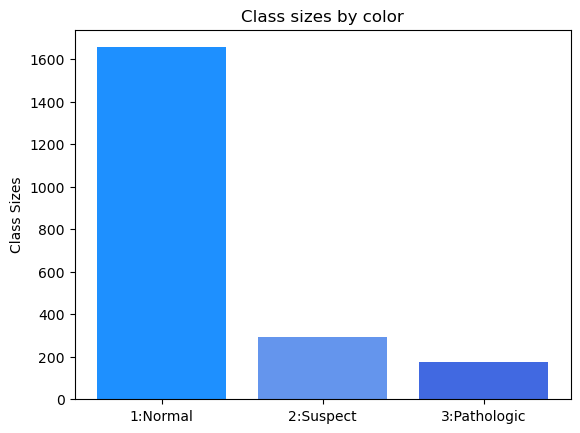

In [25]:
#Let's see how many samples we have from each sample. 
labels_size = data.groupby("NSP")
label_list = list(labels_size.size())

fig, ax = plt.subplots()

labels = ['1:Normal', '2:Suspect', '3:Pathologic']
data_counts = label_list
bar_colors = ["dodgerblue", "cornflowerblue", "royalblue"]

ax.bar(labels, data_counts, color=bar_colors)

ax.set_ylabel('Class Sizes')
ax.set_title('Class sizes by color')

plt.show()

In [26]:
#Scalate data
scaler = preprocessing.StandardScaler().fit(X)
X_escalada = scaler.transform(X)

#Since our data is way too unbalanced we will apply an stratified shuffling to ensure we have all sample types in our training and test set. 
x_train, x_test, y_train, y_test = train_test_split(X_escalada, Y, train_size=0.8, test_size=0.20, random_state=0, shuffle=True, stratify=Y)
print(type(x_train))
print(x_train.shape)
print(x_test.shape)
print(type(y_train))
print(y_train.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
(1700, 41)
(426, 41)
<class 'pandas.core.series.Series'>
(1700,)
(426,)


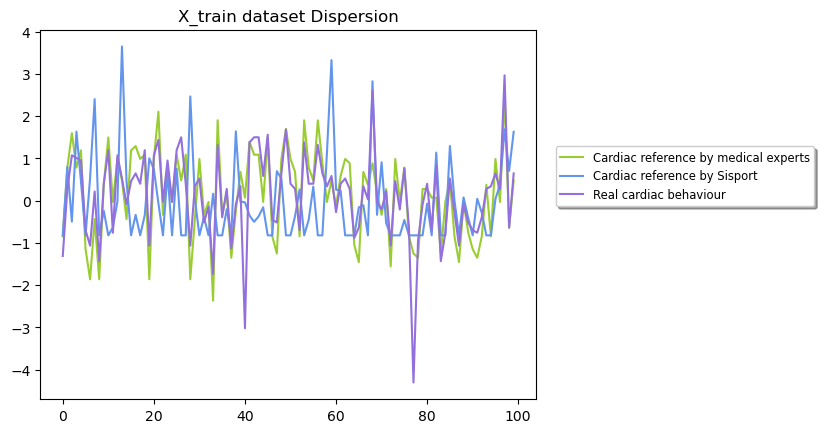

In [28]:
#We observe how our data dispersion looks like to have a baseline to compare to.  
plt.title("X_train dataset Dispersion")

#In order to have a much clearer visibility, we will take the first 100 samples.  
plt.plot(x_train[:100,9], c="yellowgreen", label="Cardiac reference by medical experts") 
plt.plot(x_train[:100,10], c="cornflowerblue", label="Cardiac reference by Sisport") 
plt.plot(x_train[:100,25], c="mediumpurple", label="Real cardiac behaviour") 

#The plot show us how much the FHR parameter is expected to oscilate.
legend = plt.legend(loc='upper center', shadow = True, fontsize = 'small', bbox_to_anchor=(1.3,0.7))

#Besides, the plot shows that the real behaviour fits better the Cardiac reference pattern delimited by Sisport. 

In [30]:
#Generate a baseline model 
clf_baseline = RandomForestClassifier()
clf_baseline.fit(x_train,y_train)
y_pred_baseline = clf_baseline.predict(x_test)

acc_score = format(accuracy_score(y_test, y_pred_baseline),".2f")
mse = format(mean_squared_error(y_test, y_pred_baseline),".2f")
r2s = format(r2_score(y_test, y_pred_baseline),".2f")

print("Model accuracy: " + str(acc_score) + "%")
print('Mean Squared error:'+ str(mse) + "%")
print('Coefficient of determination:' + str(r2s) + "%")

Model accuracy: 0.99%
Mean Squared error:0.01%
Coefficient of determination:0.97%


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


building tree 1 of 1
Model Accuracy: 0.99%
Mean Squared error:0.01%
Coefficient of determination:0.97%


<BarContainer object of 426 artists>

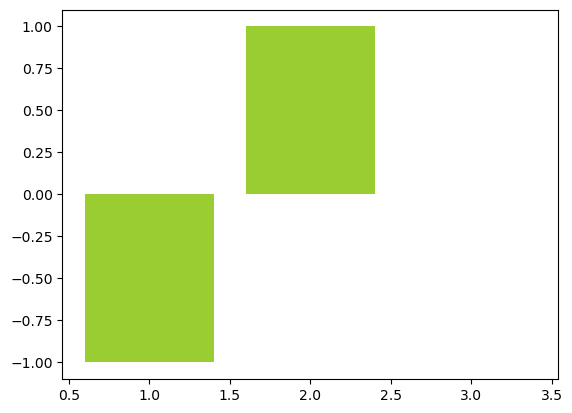

In [31]:
#Model Training
clf = RandomForestClassifier(n_estimators=1, bootstrap=True, verbose=2, max_features='sqrt')
clf.fit(x_train,y_train)

#Validation
y_pred = clf.predict(x_test)

acc_score = format(accuracy_score(y_test, y_pred),".2f")
mse = format(mean_squared_error(y_test, y_pred),".2f")
r2s = format(r2_score(y_test, y_pred_baseline),".2f")

print("Model Accuracy: " + str(acc_score) + "%")
print('Mean Squared error:'+ str(mse) + "%")
print('Coefficient of determination:' + str(r2s) + "%")

#Calculate residuals
residuos = y_pred - y_test
plt.bar(y_pred, residuos, color="yellowgreen")

In [63]:
y_test_1 = y_test.to_numpy()
print(type(y_test_1))

<class 'numpy.ndarray'>


array([2., 1., 1., 2., 1., 1., 1., 2., 1., 1.])

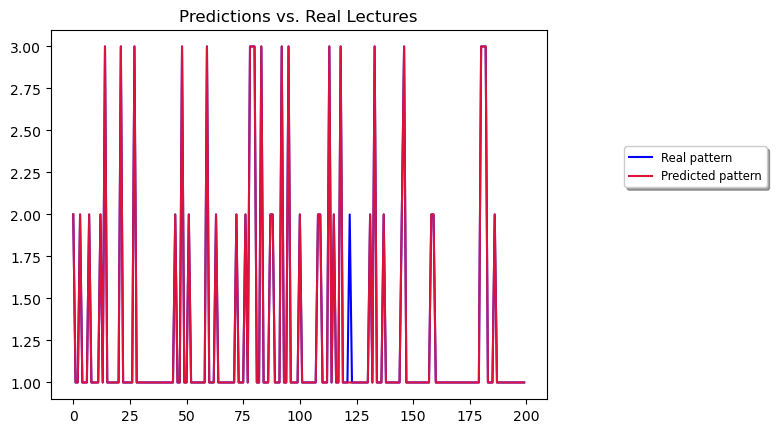

In [72]:
#We plot our predictions vs. our real data. 
plt.title("Predictions vs. Real Lectures")

plt.plot(y_test_1[:200], c="blue", label="Real pattern") 
plt.plot(y_pred[:200], c="crimson", label="Predicted pattern") 

legend = plt.legend(loc='upper center', shadow = True, fontsize = 'small', bbox_to_anchor=(1.3,0.7))

#As we can see on the plot, the pattern fits almost in 100% af the samples. 

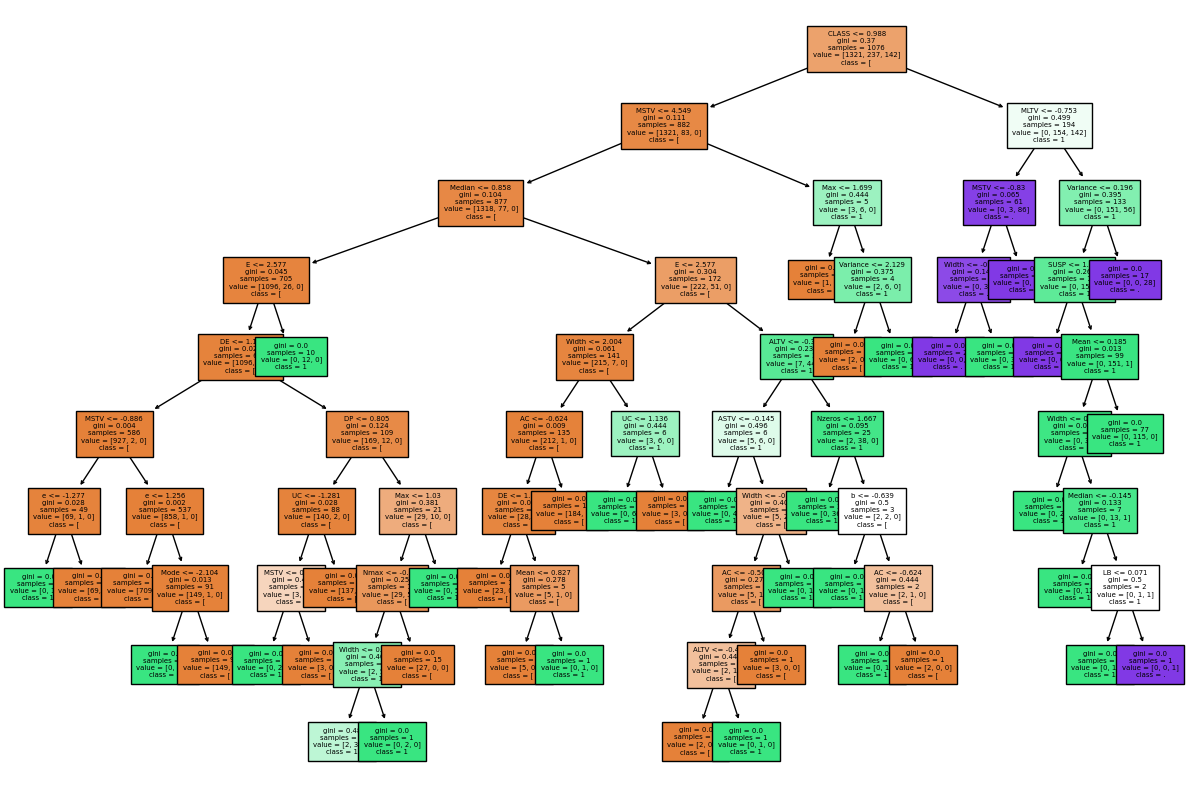

In [73]:
#Let's plot our tree. 
fn = X.columns
cn = str([1.0,2.0,3.0])

fig, axes = plt.subplots(nrows=1,  ncols=1,  figsize=(15,10))
tree.plot_tree(clf.estimators_[0],feature_names=fn,class_names=cn,filled=True, fontsize=5)
fig.savefig("clf_individual_tree.png")

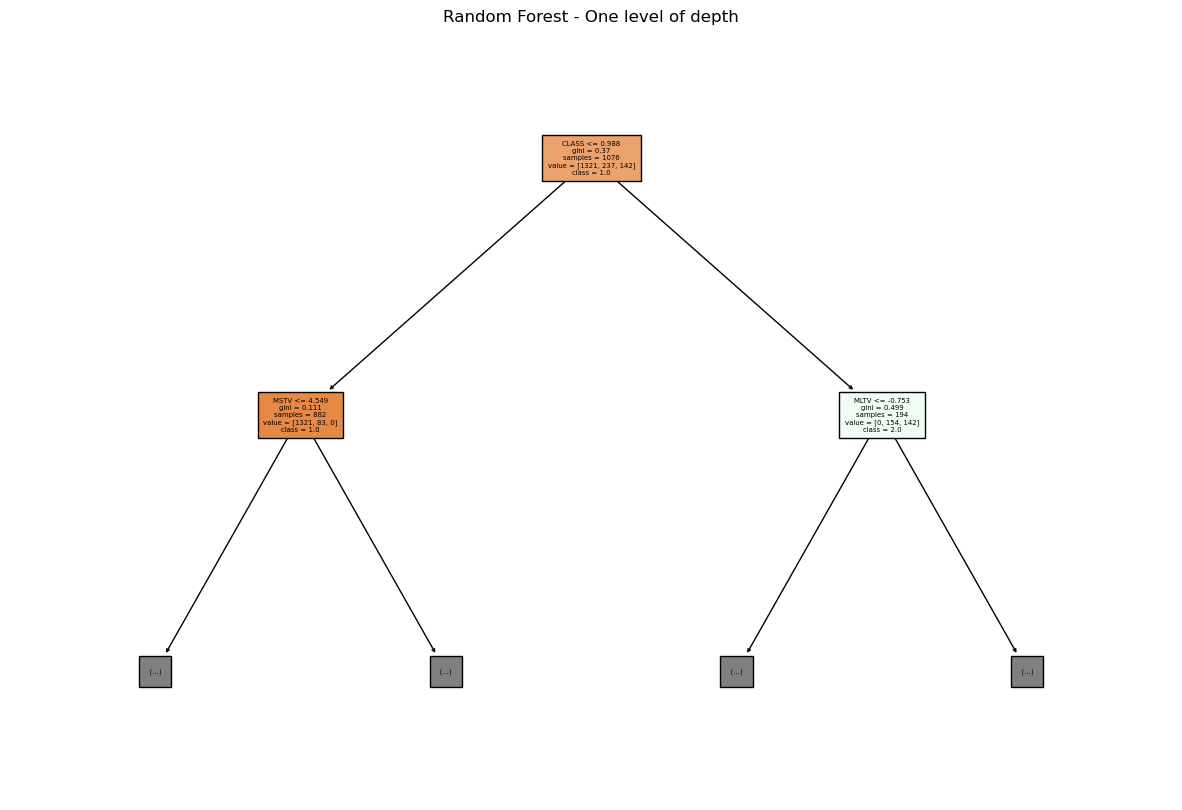

In [74]:
# We visualize the tree with one level of depth.
fn = X.columns
cn = ['1.0', '2.0', '3.0']

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
tree.plot_tree(clf.estimators_[0], feature_names=fn, class_names=cn, filled=True, fontsize=5, max_depth=1)
plt.title("Random Forest - One level of depth")
plt.show()